# Fitting Models to Data
* Notebook completed by Adam Lang
* Date: 4/15/2024
This notebook will go over fitting models to data in statistical modeling in Python. This was completed as part of the Springboard Data Science Fellowship and LinkedIn Learning course "Python Statistics Essential Training."

In [1]:
## imports
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Loading Gapminder data for year 1985
* Year of Live Aid

In [2]:
# load data
gapminder = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/gapminder.csv')

In [3]:
# select query 1985 data
gdata = gapminder.query('year == 1985')

In [5]:
# set up function
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

# define function
def plotdata():
  gdata.plot.scatter('age5_surviving', 'babies_per_woman',
                     c=colors, s=size, linewidths=0.5, edgecolor='k', alpha=0.5)

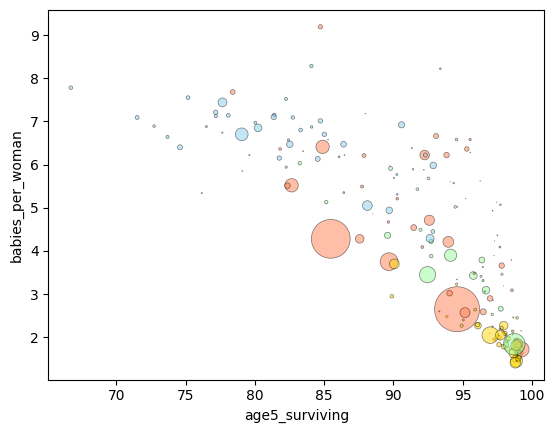

In [6]:
# plot
plotdata()

# Ordinary Least Squares (OLS)
* Fit models by minimizing the sum of squared residuals.
* "Ordinary" means the coefficients appear linearly in the model formulas.
* Statsmodels allows us to use ~ similar to R language

## Statsmodels workflow
1. Define model
2. Assign data
3. Results object/variable
4. Predict

In [9]:
## 1. Define model
model = smf.ols(formula='babies_per_woman ~ 1', data=gdata)

In [10]:
## 2. Fit model
grandmean = model.fit()

In [11]:
## 3. results object/variable
grandmean

In [15]:
def plotfit(fit):
  plotdata()
  plt.scatter(gdata.age5_surviving,fit.predict(gdata), # plot prediction for dummy variable 'fit'
              c=colors, s=30, linewidth=0.5, edgecolor='k',marker='D')

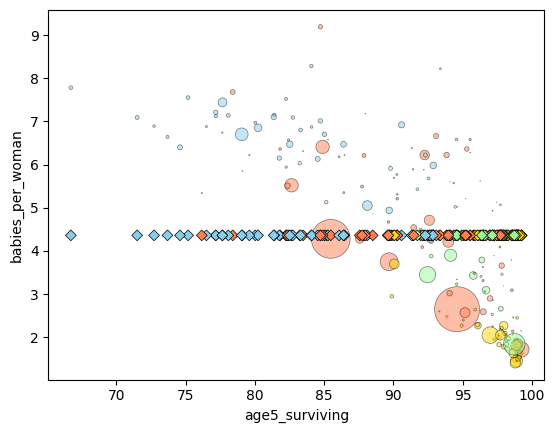

In [16]:
# plot
plotfit(grandmean)

Result: Mean of response variables

In [17]:
grandmean.params

Intercept    4.360714
dtype: float64

In [18]:
gdata.babies_per_woman.mean()

4.360714285714287

## Build another model

In [19]:
groupmeans = smf.ols(formula='babies_per_woman ~ 1 + region', data=gdata).fit()

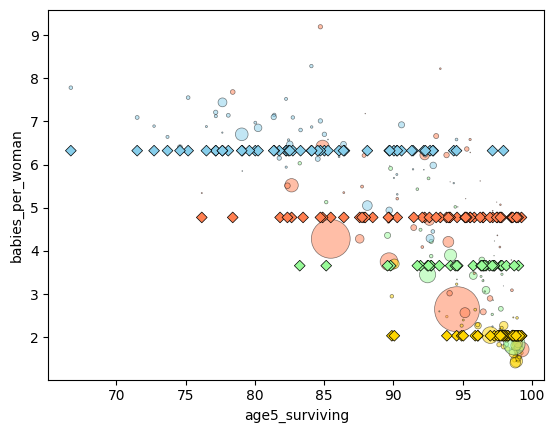

In [20]:
plotfit(groupmeans)

In [21]:
## look at params
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [22]:
# treat all groups the same => add a constant with minus 1
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [23]:
# params
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [24]:
# compare with group of means
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [27]:
## childhood survival

surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

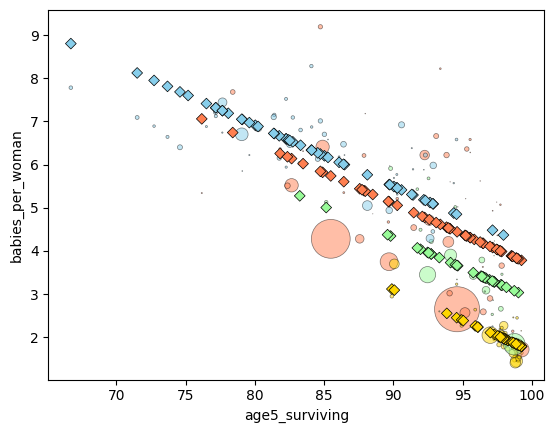

In [28]:
## plot
plotfit(surviving)

Summary: Fit is improving

In [29]:
# params
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

In [30]:
## 2 explanatory variables

surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region', data=gdata).fit()

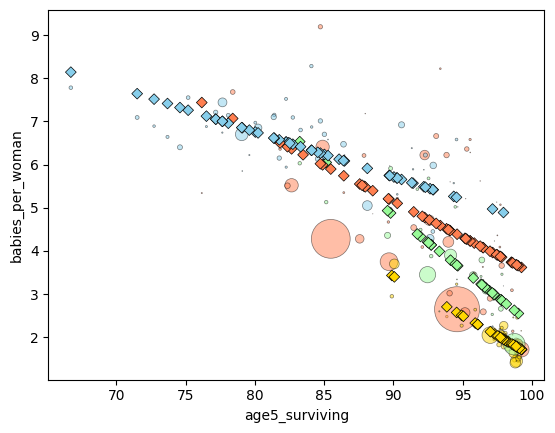

In [31]:
#plot
plotfit(surviving_byregion)

Summary: We now have 4 different slopes

In [32]:
## print params
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

India and China appear to be outliers - how can we account for them?
* Look at population proportion

In [33]:
# account for population proportion
surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population', data=gdata).fit()

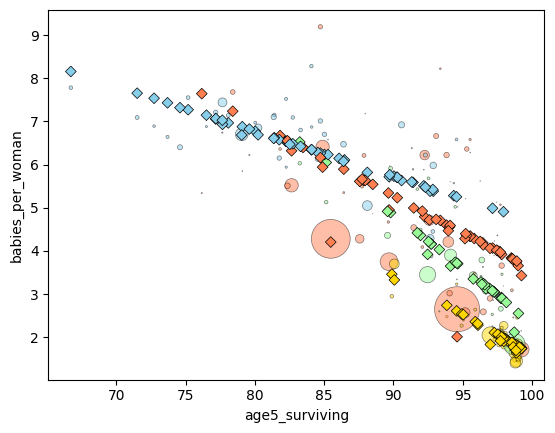

In [34]:
# plot
plotfit(surviving_byregion_population)

In [35]:
# params
surviving_byregion_population.params

region[Africa]                    1.513953e+01
region[America]                   2.721512e+01
region[Asia]                      2.060924e+01
region[Europe]                    1.997501e+01
age5_surviving:region[Africa]    -1.044609e-01
age5_surviving:region[America]   -2.484114e-01
age5_surviving:region[Asia]      -1.702392e-01
age5_surviving:region[Europe]    -1.835316e-01
population                       -2.367914e-09
dtype: float64